# LAB 1| Advanced Data Cleaning. Numerical Data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.
3. First look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the _PE8_ (snake case).
5. Change effective to date column to datetime format.
6. Check `NaN` values per column.
7. Define a function that differentiates between continuous and discrete variables. **Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. **Hint**: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.
10. What should we do with the `customer_id` column?



In [1]:
# import the neessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Ensure all pd cells are viewable.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# load data into a pandas dataframe
customer_data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_data.shape
customer_data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# View information about the data.
customer_data.info
customer_data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [4]:
# Rename column headers to follow _PE8_ (snake case) convention.
customer_data.columns
new_headers = ['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']
# define function to rename headers.
import re

def snake_moder(x):
    x = x.lower()
    x = re.sub('\s', '_', x)
    return x

headers = list(map(snake_moder, new_headers))
customer_data.columns = headers

In [5]:
# Change effective_to_date column to datetime format.
customer_data['effective_to_date'] = pd.to_datetime(customer_data['effective_to_date'])
customer_data['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

In [6]:
# Check NaN Values per column.
NaN_sums = customer_data.isnull().sum()
NaN_percent = customer_data.isna().sum()/len(customer_data)
NaN_sums
NaN_percent

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [7]:
# Define a function that differentiates between continuous and discrete variables.

def variable_check(df):
    discrete = []
    continuous = []
    categorical = []
    pattern = '[a-z]*'
    for column in df.columns:
        if df[column].dtype == 'int64' and len(df[column].unique())/len(df[column]) > 0.05 or df[column].dtype == 'float64'and len(df[column].unique())/len(df[column]) > 0.05 :
            continuous.append(column)
        elif df[column].dtype == 'int64' and len(df[column].unique())/len(df[column]) < 0.05 or df[column].dtype == 'float64'and len(df[column].unique())/len(df[column]) < 0.05:
            discrete.append(column)
        else:
            categorical.append(column)
    return  continuous, discrete, categorical

continuous,discrete,categorical = variable_check(customer_data)
display(continuous)
display(discrete)
display(categorical)



            



['customer_lifetime_value', 'income', 'total_claim_amount']

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [8]:
# create data frame of continuous variables
customer_continuous = customer_data[continuous]
display(customer_continuous.head())
# create dataframe of discrete variables
customer_discretes = customer_data[discrete]
display(customer_discretes.head())

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [9]:
# create a dataframe of categorical variables
customer_categoricals = customer_data[categorical]
customer_categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
# What should be done wuth the 'customer_id' column?

- The customer_id column should only be used to ensure that we do not have redundant data for the same customer ids.  
- If there are no duplicate entries for the same customer ids, we can assume that each row is a unique record.
- Therefore we can drop the customer_id column as it should not serve any further purpose for our analysis.  

# Lab 2 | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.

### Instructions

1. Import the necessary libraries if you are starting a new notebook.
2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.
3. Plot a correlation matrix, what can you see?
4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
5. What can you see in the plots?
6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
7. Have you found outliers? If you have, what should we do with them?
8. Check nan values per column.
9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
11. Get categorical features.
12. What should we do with the customer id column?


In [11]:
# Load continuous features into continuous_df dataframe
continuous_df = customer_continuous

# Load discrete features into discrete_df dataframe
discrete_df = customer_discretes

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

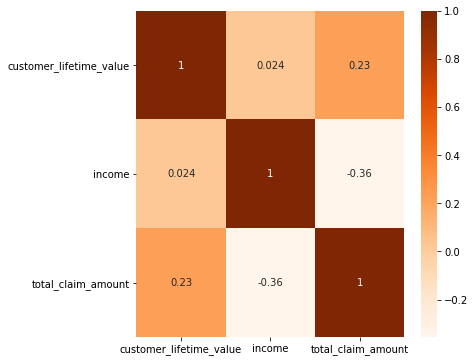

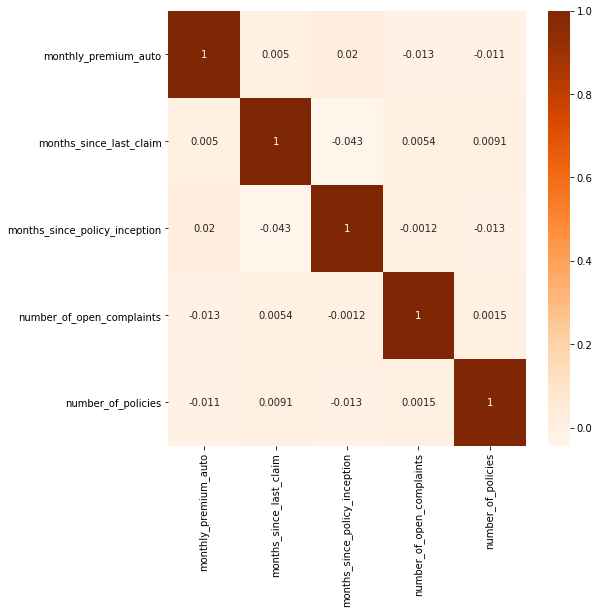

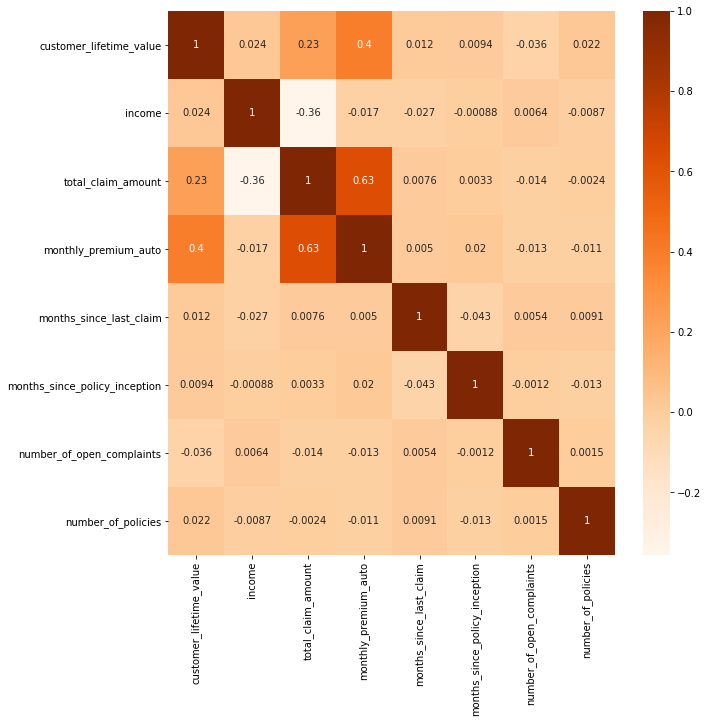

In [12]:
# Define a function to plot a correlation matrix and visualize correlation matrices as heatmaps
def heatmapper(dataframe, size = (20,20)):
    fig = plt.figure(figsize= size)
    correlation_matrix = dataframe.corr()
    heatmap = sns.heatmap(correlation_matrix, cmap = 'Oranges', annot=True)
    return heatmap

numerical_df = pd.concat([continuous_df,discrete_df], axis = 1) 

heatmap1 = heatmapper(continuous_df, size = (6,6))
heatmap2 = heatmapper(discrete_df, size = (8,8))
heatmap3 = heatmapper(numerical_df, size = (10,10))
display(heatmap1)
display(heatmap2)
display(heatmap3)


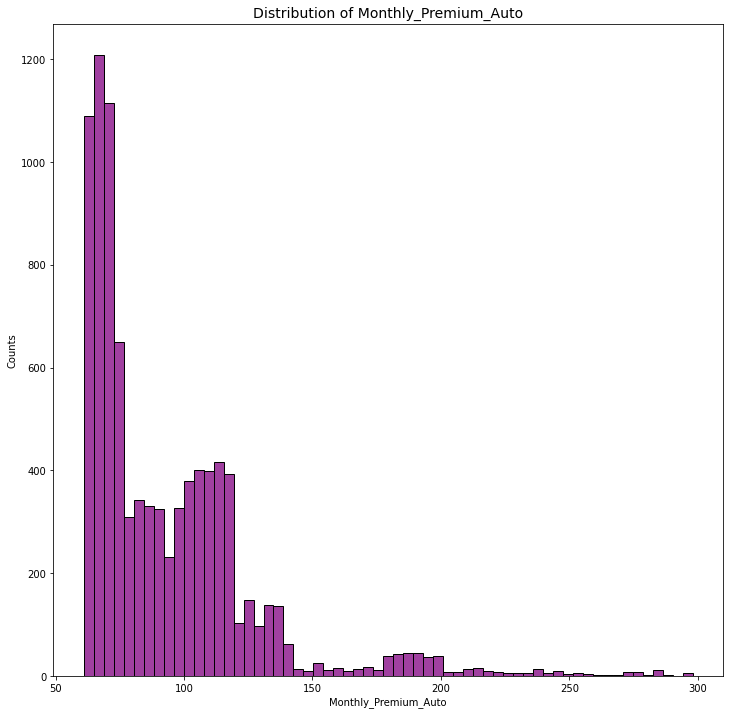

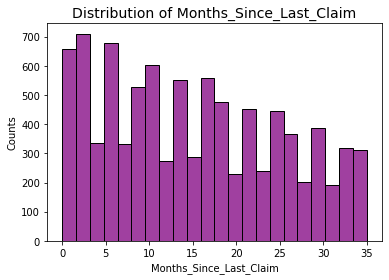

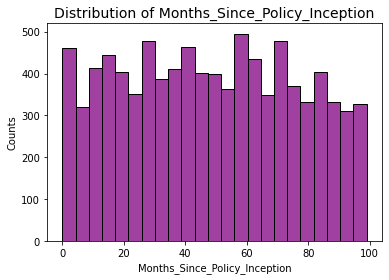

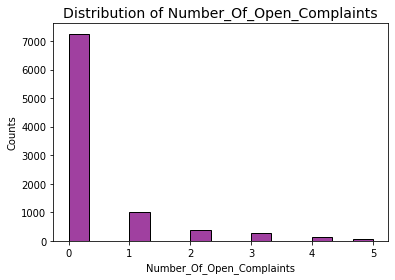

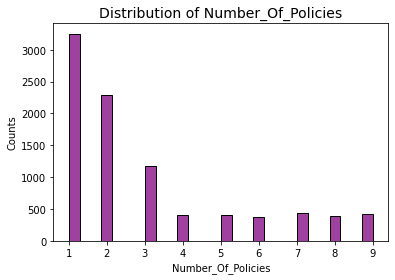

In [13]:
#Create a function to plot every discrete variables.

def discrete_plotter(df, size = (8,8)):
    fig = plt.figure(figsize= size)
    for feature in df.columns:    # define plot figure
        fig = plt.figsize = size
    # define the type and styling of plot
        sns.histplot( df[feature], color = 'purple')
        plt.ylabel('Counts')
        plt.xlabel(f'{feature.title()}')
        plt.title(f'Distribution of {feature.title()}', fontsize = 14)
        plt.show()

discrete_plotter(discrete_df, size = (12,12))

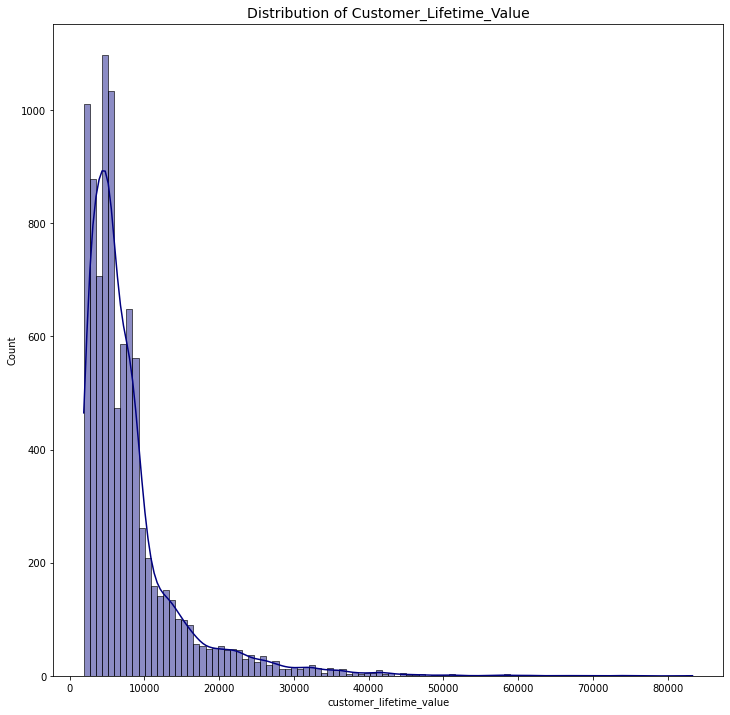

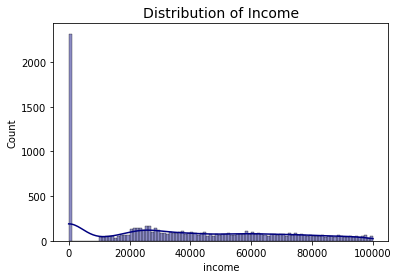

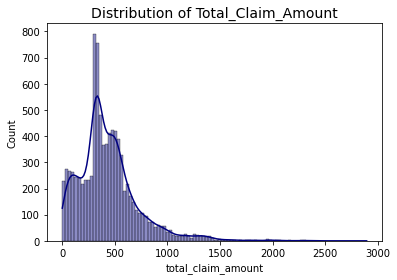

In [14]:
def continuous_hist_plotter(df, size = (8,8), bins = 10):
    fig = plt.figure(figsize= size)
    for feature in df.columns:    # define plot figure
        fig = plt.figsize = size
    # define the type and styling of plot
        sns.histplot(df[feature], kde= True, color = 'Navy',alpha = 0.45, bins = bins)
        plt.title(f'Distribution of {feature.title()}', fontsize = 14)
        plt.show()

continuous_hist_plotter(continuous_df, size = (12,12), bins = 100)

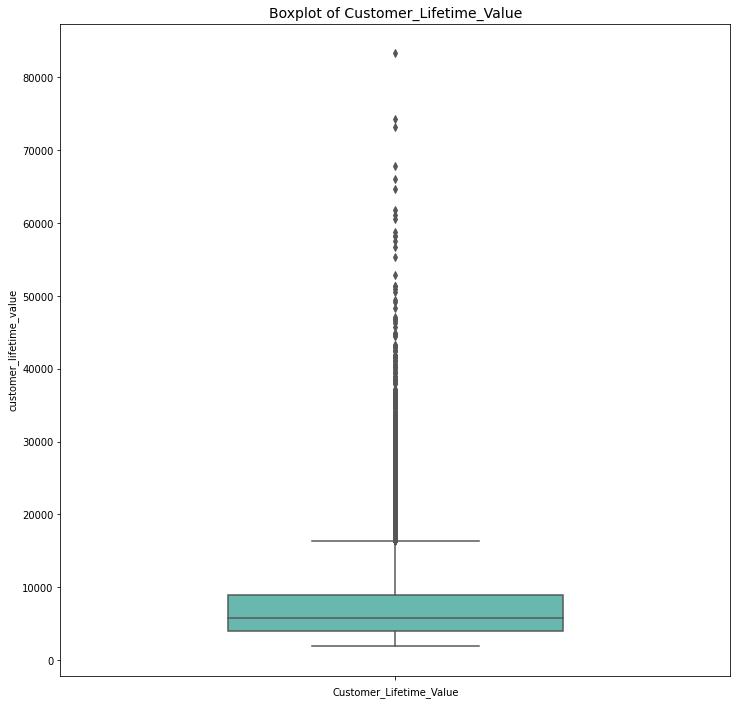

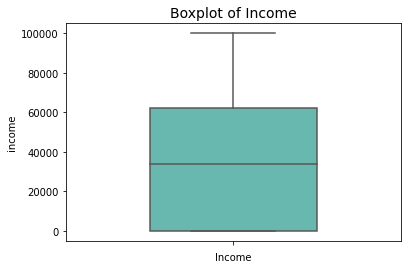

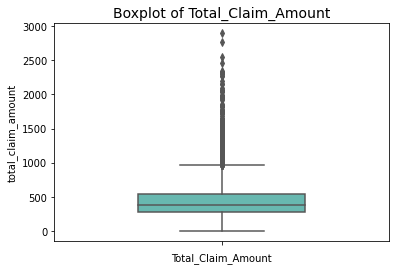

In [16]:
def continuous_boxplotter(df, size = (8,8)):
    fig = plt.figure(figsize= size)
    for feature in df.columns:    # define plot figure
        fig = plt.figsize = size
    # define the type and styling of plot
        sns.boxplot(y = df[feature], orient= 'v', color = 'turquoise', saturation=0.5, width=0.5 )
        plt.xlabel(f'{feature.title()}')
        plt.title(f'Boxplot of {feature.title()}', fontsize = 14)
        plt.show()

continuous_boxplotter(continuous_df, size = (12,12))

In [17]:
# Considering the number of outliers in the Total_Claim_Amount and Customer_lifetime_value columns, it might be a good idea to 
# to apply a log transformation on the data to reduce the skewing of the data.

# define a function to transform each value in a series to its respective log.
from math import log

def log_transformer(x):
    if np.isfinite(x) and x != 0:
        x = np.log(x)
        return x
    else:
        x = 0
        return x

for column in continuous_df.columns:
    continuous_df[column] = continuous_df[column].apply(lambda x: log_transformer(x))

continuous_df.head()




C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,customer_lifetime_value,income,total_claim_amount
0,7.924260,10.937988,5.952753
1,8.850738,0.000000,7.031268
2,9.464008,10.794809,6.339428
3,8.941920,0.000000,6.272653
4,7.942253,10.688211,4.928202


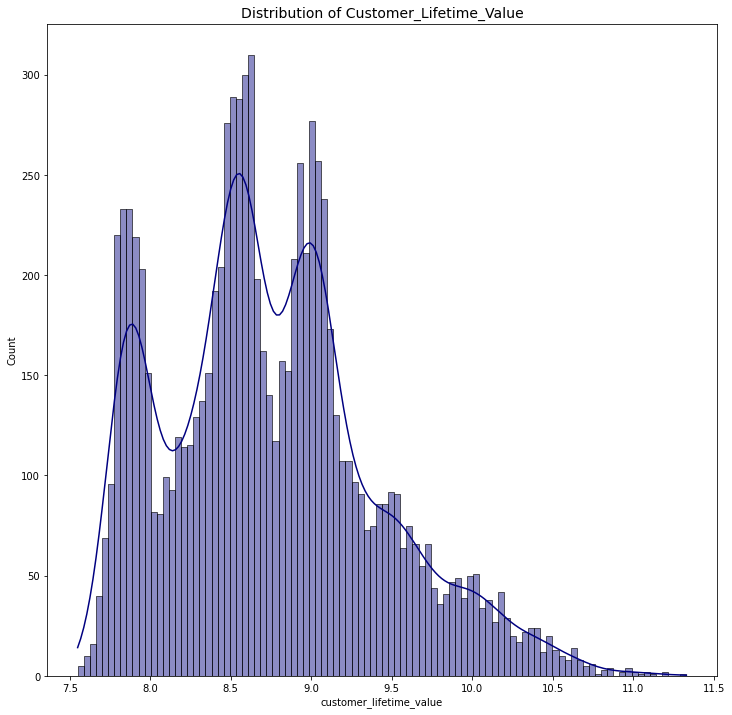

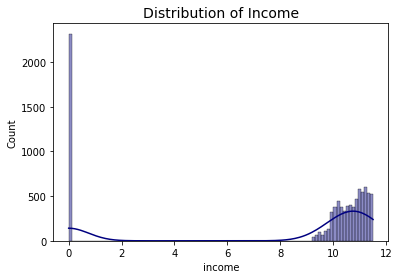

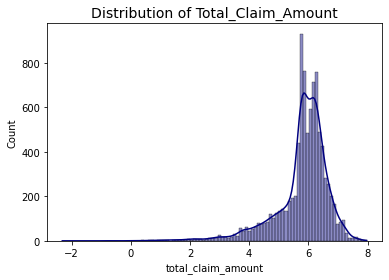

In [18]:
continuous_hist_plotter(continuous_df, size = (12,12), bins = 100)

In [19]:
# limit data by interquartile ranges


In [30]:
# define function to determine the upper limit of distribution.

def iqr_decap(series):
    col_iqr = np.percentile(series,75) - np.percentile(series,25)
    col_iqr_upper_limit = np.percentile(series,75) + col_iqr*1.5
    return col_iqr_upper_limit

# define function to remove values over the upper limit
def outlier_counter(x,iqr_upper_limit):
    iqr_upper_limit
    if x < 0 or  x > iqr_upper_limit:
        return np.NaN
    else:
        return x

# apply functions
clv = iqr_decap(continuous_df['customer_lifetime_value'])
tca = iqr_decap(continuous_df['total_claim_amount'])
inc = iqr_decap(continuous_df['income'])

CLV = continuous_df['customer_lifetime_value'].apply(lambda x: outlier_counter(x,clv))
TCA = continuous_df['total_claim_amount'].apply(lambda x: outlier_counter(x,tca))
INC = continuous_df['income'].apply(lambda x: outlier_counter(x,inc))


In [31]:
# count outliers ( not coded as NaNs)
CLV.isna().sum()
TCA.isna().sum()
#INC.isna().sum()

63

In [32]:
# Drop outliers


In [33]:
# concatenate the dataframes and drop the rows with NaN Values.
continuous_df_cut = pd.concat([CLV,TCA,INC], axis = 1)
display(continuous_df_cut.shape)
continuous_df_cut.dropna(axis = 0,inplace = True)
display(continuous_df_cut.shape)

(9134, 3)

(8892, 3)

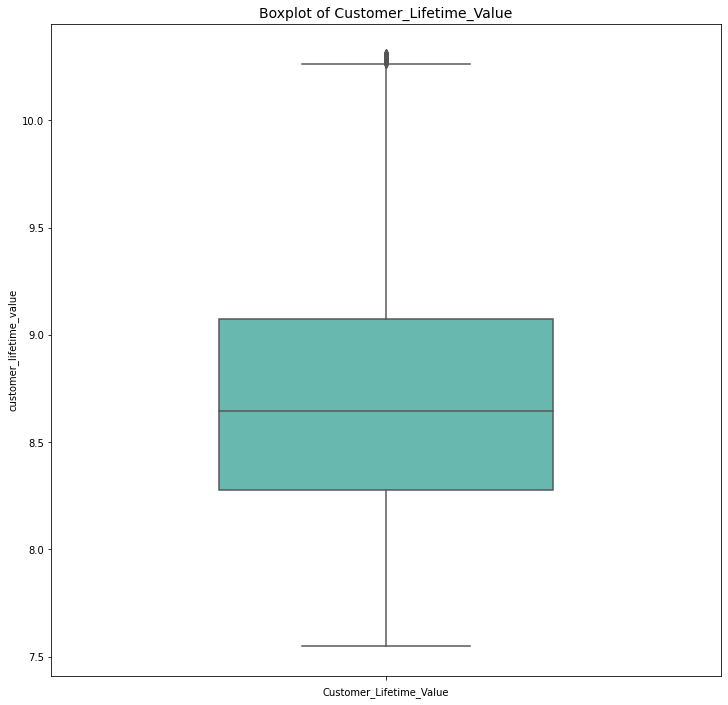

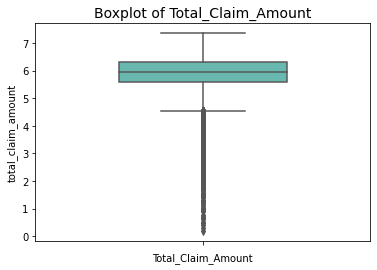

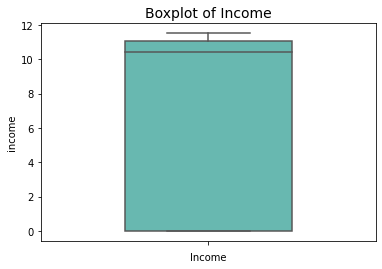

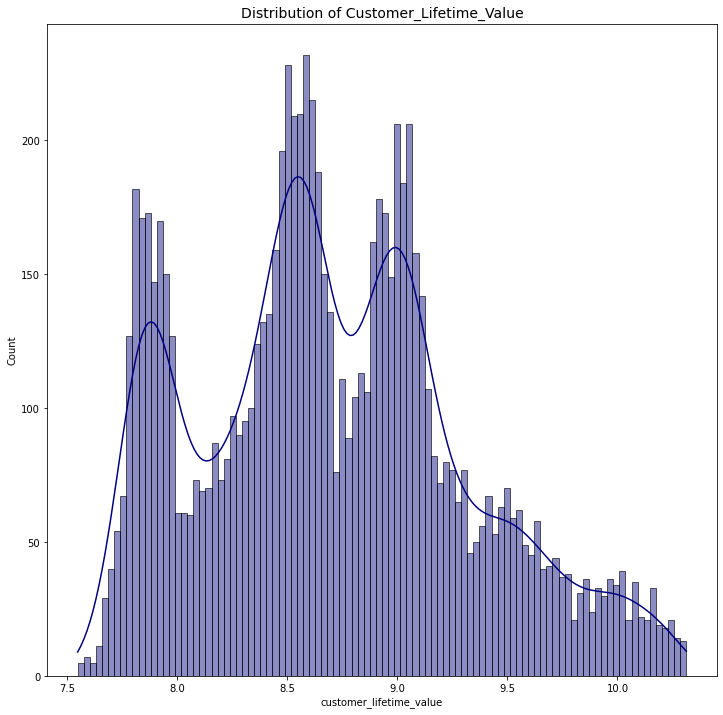

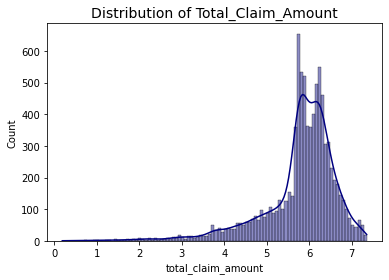

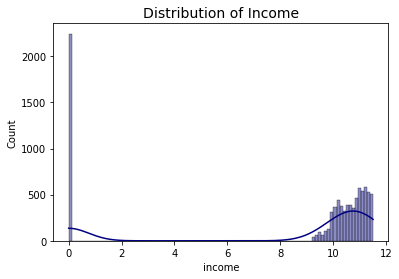

In [34]:
# visualize data with outliers removed.
continuous_boxplotter(continuous_df_cut, size = (12,12))
continuous_hist_plotter(continuous_df_cut, size = (12,12), bins = 100)